<a href="https://colab.research.google.com/github/Jedge1139/Mall_Data_Analysis/blob/main/Mall_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**Univariate Analysis**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

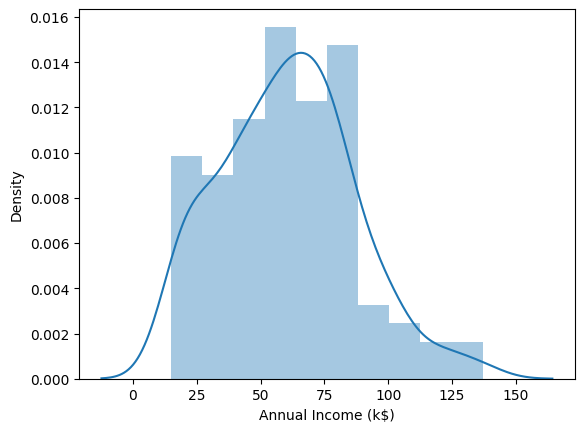

In [ ]:
sns.distplot(df['Annual Income (k$)'])

In [ ]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

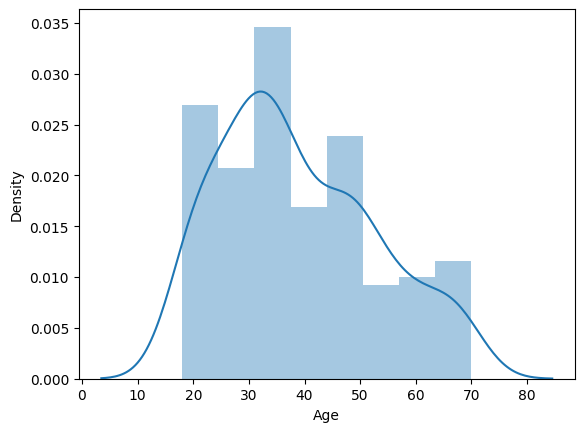

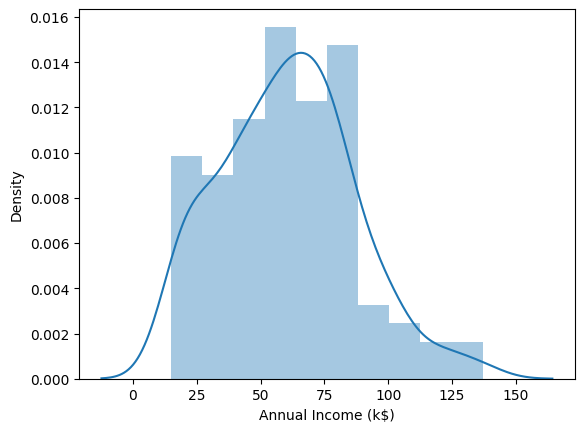

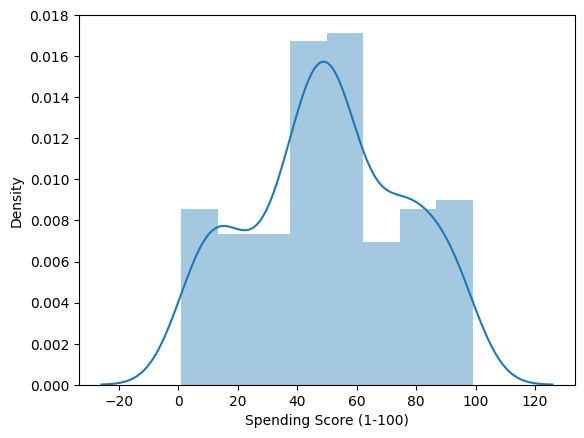

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

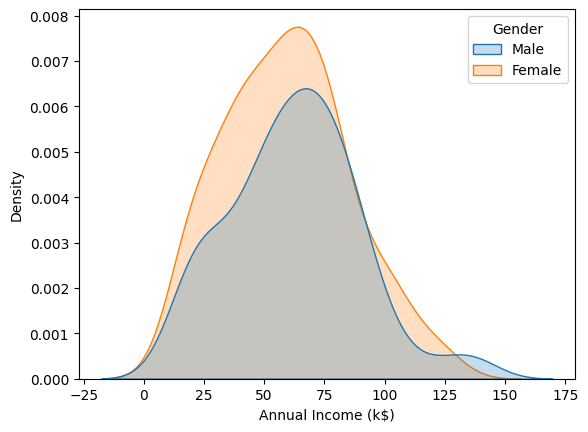

In [ ]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

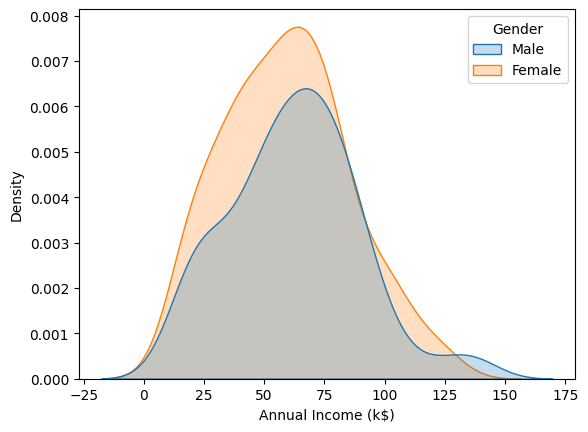

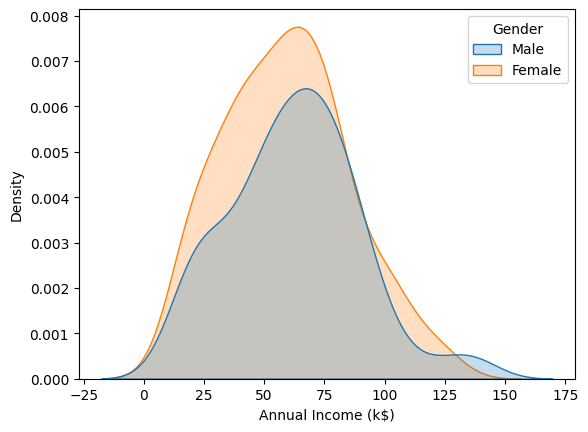

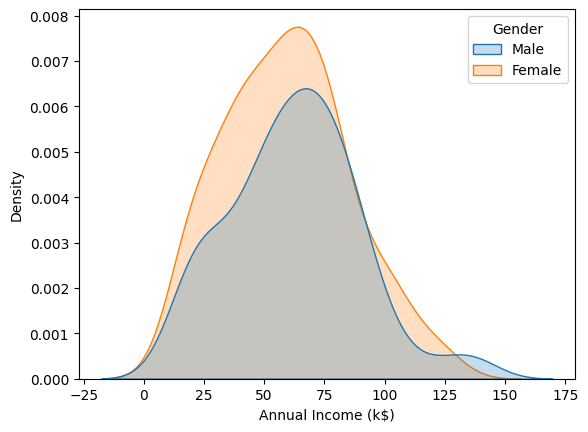

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

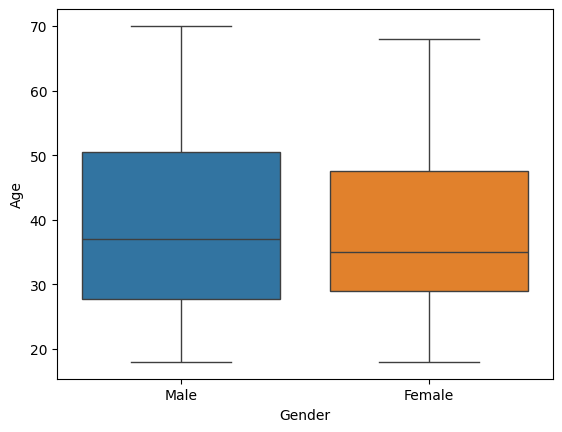

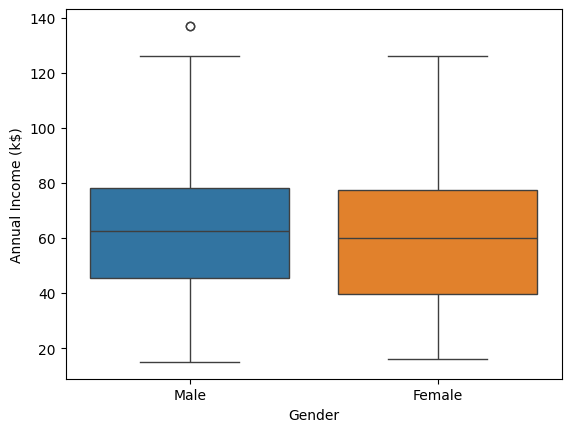

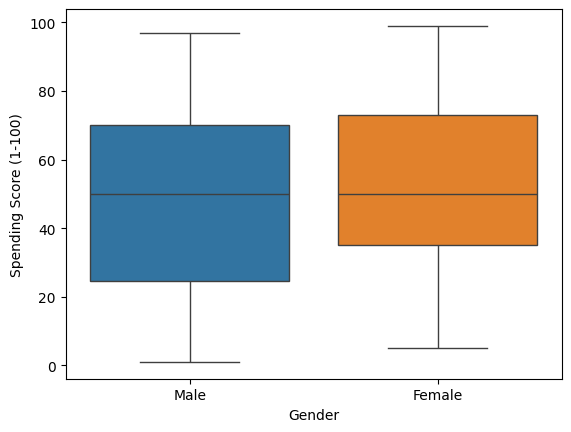

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df, x='Gender', y=df[i], hue='Gender')

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

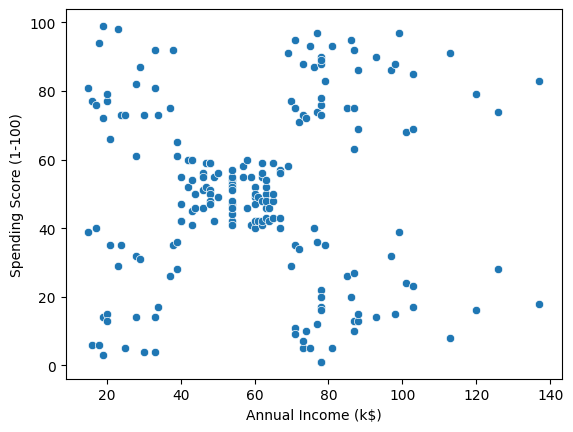

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

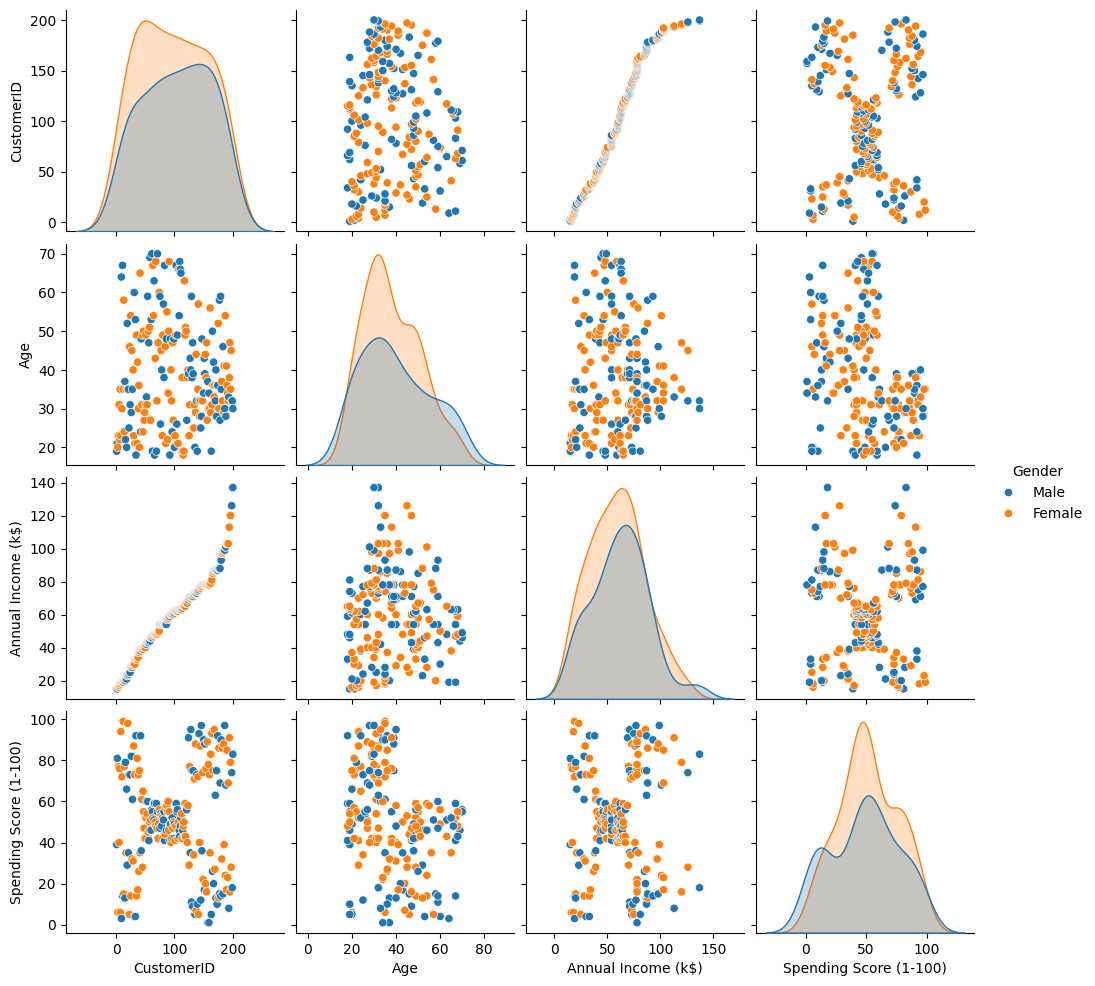

In [ ]:
#df = df.drop(['CustomerID'], axis=1)
sns.pairplot(df,hue= 'Gender')

In [ ]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
display(df_encoded.corr())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.057400,0.060867,0.056410,-0.058109,1.000000


<Axes: >

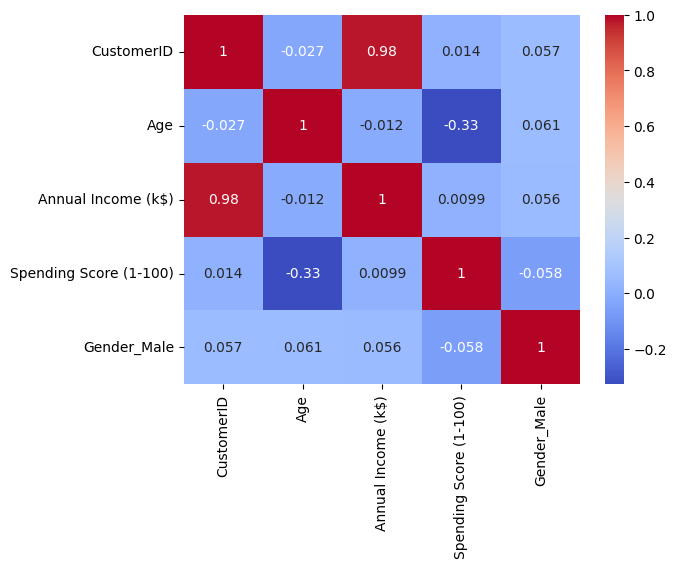

In [ ]:
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

#Clustering - Univariate, Bivariate, Multivariate

In [ ]:
clustering1 = KMeans(n_clusters=6)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [ ]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [ ]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [ ]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,54
1,50
4,42
3,32
2,16
5,6


In [ ]:
clustering1.inertia_

5443.614973544972

In [ ]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)


In [ ]:
inertia_scores

[137277.2800000002,
 49761.737012987025,
 25341.285871863212,
 13278.112713472474,
 9384.572427572422,
 5728.855832763724,
 4244.8487179487165,
 3021.5955988456008,
 2269.356837606838,
 2177.166810966812]

Text(0, 0.5, 'Inertia Score')

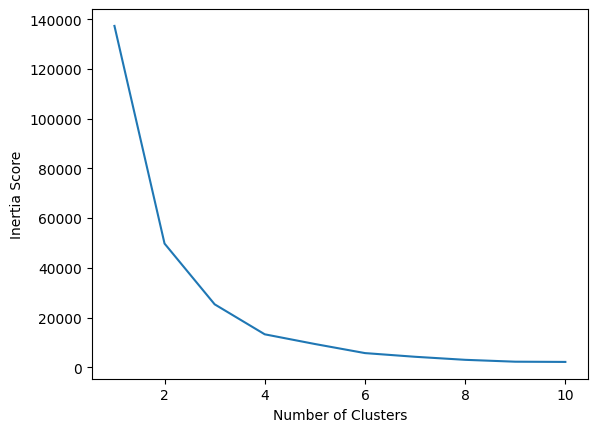

In [ ]:
plt.plot(range(1,11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')

In [ ]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.018519,78.370370,49.555556
1,41.520000,60.440000,50.060000
2,37.812500,100.875000,52.875000
3,34.906250,22.000000,49.656250
4,43.000000,42.238095,50.666667
5,36.833333,127.666667,49.666667


Bivariate Clustering

In [ ]:
clustering2 = KMeans(n_clusters=5)

In [ ]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [ ]:
clustering2.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [ ]:
df['Spending Cluster']= clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,3,1


In [ ]:
inertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)


Text(0, 0.5, 'Inertia Score')

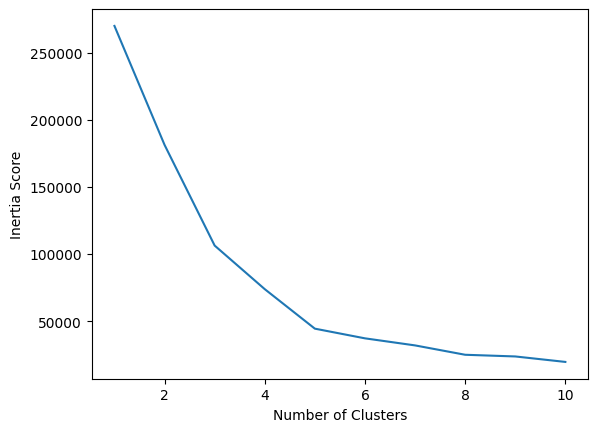

In [ ]:
plt.plot(range(1,11), inertia_scores2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')

In [ ]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x', 'y']
centers

,x,y
0,55.296296,49.518519
1,26.304348,20.913043
2,88.200000,17.114286
3,25.727273,79.363636
4,86.538462,82.128205


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

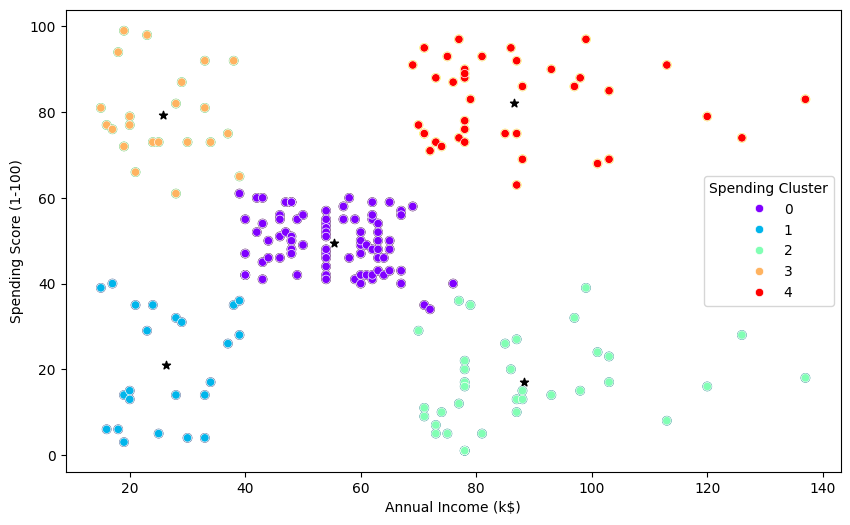

In [ ]:
from re import X
plt.figure(figsize=(10,6))
plt.scatter(x=centers['x'], y=centers['y'], color='black',marker='*')
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=df['Spending Cluster'])
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending Cluster', palette='rainbow')

In [ ]:
pd.crosstab(df['Spending Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending Cluster,,
0,0.592593,0.407407
1,0.608696,0.391304
2,0.457143,0.542857
3,0.590909,0.409091
4,0.538462,0.461538


In [ ]:
df.groupby(['Spending Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


Multivariate Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,3,1


In [ ]:
dff= pd.get_dummies(df, dtype=int, columns=['Gender'], drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster,Gender_Male
0,1,19,15,39,3,1,1
1,2,21,15,81,3,3,1
2,3,20,16,6,3,1,0
3,4,23,16,77,3,3,0
4,5,31,17,40,3,1,0


In [ ]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
dff =  scale.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Text(0, 0.5, 'Inertia Score')

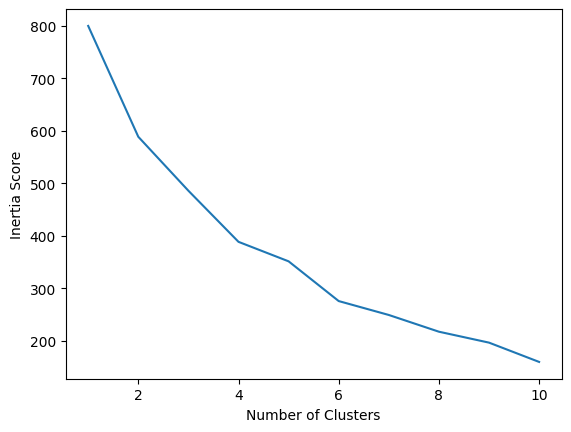

In [ ]:
inertia_scores3=[]
for i in range(1,11):
  kmeans3=KMeans(n_clusters=i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,5,4
196,197,Female,45,126,28,5,2
197,198,Male,32,126,74,5,4
198,199,Male,32,137,18,5,2
